# A.P. Moller - Maersk

A.P. Moller - Maersk is a Danish shipping and logistics company founded in 1904 by Arnold Peter Møller and his father Peter Mærsk Møller. Their business activities include shipping, port operation, supply chain management, and warehousing. 

As the global leader in shipping services, Maersk operates in 130 countries and employs approximately 95,000 people.


Name: Saksham Jain
<br>
PRN: 21070126075
<br>
Branch: AIML
<br>
E-mail ID: sakshamgr8online@gmail.com
<br>
College E-mail ID: saksham.jain.btech2021@sitpune.edu.in
<br>
Phone Number: 7709232003
<br>

# Understanding the Dataset

A.P. Moller - Maersk, being a shipping and logistics company, has provided data regarding one of their products. The training data spans from July 2020 to May 2021 and contains comprehensive details about the product.

## Dataset Features:

- **ProductType**: Type of the product.
- **Manufacturer**: Manufacturer of the product.
- **Area Code**: Area code related to the product.
- **Sourcing Channel**: Channel through which the product is sourced.
- **Product Size**: Size of the product.
- **Month of Sourcing**: Month in which the product is sourced.
- **Sourcing Cost**: Cost associated with sourcing the product.

This dataset will undergo preprocessing, followed by Exploratory Data Analysis (EDA) to extract valuable insights, which will guide further training and decision-making processes.


In [120]:
import numpy as np
import pandas as pd

In [121]:
data = pd.read_excel("Train_Data.xlsx")

#### Extracting all the information from the available data

In [122]:
data.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM3,X1,A28,WHOLESALE,Large,Powder,2021-05-01,10.158
1,NTM2,X1,A9,DIRECT,Large,Powder,2020-10-01,134.281
2,NTM3,X2,A20,DIRECT,Large,Powder,2020-12-01,12.456
3,NTM3,X1,A18,WHOLESALE,Small,Powder,2021-02-01,107.220
4,NTM2,X1,A28,DIRECT,Large,Liquid,2020-11-01,197.763


In [123]:
data = pd.DataFrame(data)
data

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM3,X1,A28,WHOLESALE,Large,Powder,2021-05-01,10.158
1,NTM2,X1,A9,DIRECT,Large,Powder,2020-10-01,134.281
2,NTM3,X2,A20,DIRECT,Large,Powder,2020-12-01,12.456
3,NTM3,X1,A18,WHOLESALE,Small,Powder,2021-02-01,107.220
4,NTM2,X1,A28,DIRECT,Large,Liquid,2020-11-01,197.763
...,...,...,...,...,...,...,...,...
550171,NTM2,X1,A5,DIRECT,Large,Powder,2020-07-01,136.469
550172,NTM3,X1,A14,DIRECT,Large,Liquid,2020-10-01,72.559
550173,NTM2,X1,A5,DIRECT,Small,Powder,2021-03-01,147.639
550174,NTM2,X1,A7,DIRECT,Small,Powder,2021-02-01,150.044


In [124]:
data.shape

(550176, 8)

In [125]:
data.isnull().sum()

ProductType          0
Manufacturer         0
Area Code            0
Sourcing Channel     0
Product Size         0
Product Type         0
Month of Sourcing    0
Sourcing Cost        0
dtype: int64

In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550176 entries, 0 to 550175
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   ProductType        550176 non-null  object        
 1   Manufacturer       550176 non-null  object        
 2   Area Code          550176 non-null  object        
 3   Sourcing Channel   550176 non-null  object        
 4   Product Size       550176 non-null  object        
 5   Product Type       550176 non-null  object        
 6   Month of Sourcing  550176 non-null  datetime64[ns]
 7   Sourcing Cost      550176 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 33.6+ MB


"Extracted all the unique values associated with each column:"


In [127]:
print("ProductType ", data["ProductType"].unique())
print("Manufacturer ", data["Manufacturer"].unique())
print("Area Code ", data["Area Code"].unique())
print("Sourcing Channel ", data["Sourcing Channel"].unique())
print("Product Size ", data["Product Size"].unique())
print("Product Type ", data["Product Type"].unique())

ProductType  ['NTM3' 'NTM2' 'NTM1']
Manufacturer  ['X1' 'X2' 'X3']
Area Code  ['A28' 'A9' 'A20' 'A18' 'A10' 'A19' 'A29' 'A7' 'A2' 'A8' 'A4' 'A6' 'A30'
 'A35' 'A44' 'A45' 'A31' 'A25' 'A37' 'A32' 'A34' 'A46' 'A11' 'A39' 'A41'
 'A17' 'A38' 'A5' 'A22' 'A3' 'A12' 'A24' 'A36' 'A42' 'A14' 'A43' 'A33'
 'A15' 'A40' 'A21' 'A16' 'A13' 'A1' 'A23' 'A26']
Sourcing Channel  ['WHOLESALE' 'DIRECT' 'RETAIL' 'ECOM']
Product Size  ['Large' 'Small' 'ExtraLarge']
Product Type  ['Powder' 'Liquid']


In [128]:
data.describe()

,Month of Sourcing,Sourcing Cost
count,550176,550176.000000
mean,2020-12-08 10:27:28.769848576,108.816793
min,2020-07-01 00:00:00,-196.070000
25%,2020-10-01 00:00:00,57.000000
50%,2020-12-01 00:00:00,132.000000
75%,2021-03-01 00:00:00,146.147000
max,2021-05-01 00:00:00,32632.500000
std,NaN,104.390097


### Data Preprocessing (Removing Outliers)

After manually inspecting the data and plotting box plots to look for outliers, I checked for the most common outliers present. I identified several values that did not fall within a specific range.

To address this, I performed the following outlier treatment steps:

1. **Removing Rows with Zero or Negative Values:**
   - Any data points that were zero or below zero were considered outliers and removed from the dataset.

2. **Handling Missing Prices:**
   - Products without any listed price were deemed outliers and were removed from the dataset.

3. **Addressing High Price Values:**
   - Values that were priced higher than the usual range were identified and examined further.

These steps were taken to ensure the integrity and reliability of the dataset for further analysis.


In [129]:
max_value = data["Sourcing Cost"].max()

num_zeros = (data["Sourcing Cost"] == 0).sum()

num_below_zero = (data["Sourcing Cost"] < 1).sum()

num_above_275 = (data["Sourcing Cost"] > 275).sum()

print("Maximum value in the dataset:", max_value)
print("Number of zero values in the dataset:", num_zeros)
print("Number of values below zero in the dataset:", num_below_zero)
print("Number of values above 275 in the dataset:", num_above_275)

Maximum value in the dataset: 32632.5
Number of zero values in the dataset: 10084
Number of values below zero in the dataset: 18826
Number of values above 275 in the dataset: 2676


##### The box plot offers a concise summary of the distribution of sourcing costs, highlighting potential outliers and providing insights into the central tendency and spread of the data.

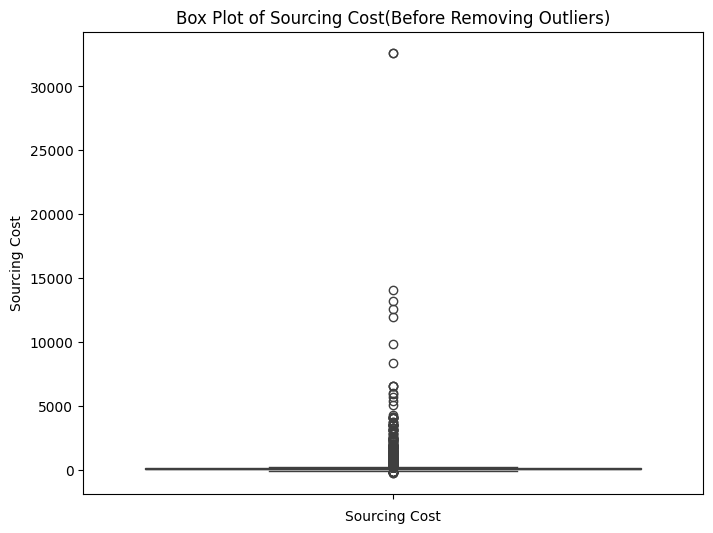

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a box plot for the target column ('Sourcing Cost')
plt.figure(figsize=(8, 6))
sns.boxplot(data=data['Sourcing Cost'])
plt.title('Box Plot of Sourcing Cost(Before Removing Outliers)')
plt.xlabel('Sourcing Cost')
plt.show()


In [131]:
data = data[data['Sourcing Cost'] > 1]
data = data[data['Sourcing Cost'] < 270]

### Ordinal Encoding for Product Size:

I applied Ordinal Encoding to the 'Product Size' column to convert categorical values into numerical representations.

### Target Encoding for Other Columns:

For the remaining categorical columns, I utilized Target Encoding to encode them based on the target variable.

### Separating Date Column:

I split the 'Date' column into two separate columns, 'Month' and 'Year', to facilitate further analysis and modeling.

These preprocessing steps were undertaken to prepare the data for subsequent analysis and modeling tasks.


In [132]:
data['Month of Sourcing'] = pd.to_datetime(data['Month of Sourcing'])
data.sort_values(by='Month of Sourcing', inplace=True)

data['Sourcing Month'] = data['Month of Sourcing'].dt.month
data['Sourcing Year'] = data['Month of Sourcing'].dt.year

data.drop(columns=['Month of Sourcing'], inplace=True)

sourcing_cost_column = data.pop('Sourcing Cost')
data['Sourcing Cost'] = sourcing_cost_column

from category_encoders import TargetEncoder, OrdinalEncoder

target_encoder = TargetEncoder()

categorical_cols = ['ProductType', 'Manufacturer', 'Sourcing Channel', 'Area Code', 'Product Type']
data[categorical_cols] = target_encoder.fit_transform(data[categorical_cols], data['Sourcing Cost'])

ordinal_encoder = OrdinalEncoder(cols=['Product Size', 'Product Type'], mapping=[{'col': 'Product Size', 'mapping': {'Small': 1, 'Large': 2, 'ExtraLarge': 3}}])

data = ordinal_encoder.fit_transform(data)

data.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Sourcing Month,Sourcing Year,Sourcing Cost
328583,116.008112,122.437056,142.433118,111.754761,2,112.424396,7,2020,132.359
299114,116.008112,71.405826,24.537864,111.754761,2,94.941958,7,2020,24.200
80822,121.675268,122.437056,144.989452,111.754761,2,112.424396,7,2020,137.644
80823,121.675268,122.437056,137.371809,111.754761,2,94.941958,7,2020,132.537
465224,116.008112,122.437056,103.239262,111.754761,1,112.424396,7,2020,114.899


## Performing Exploratory Data Analysis

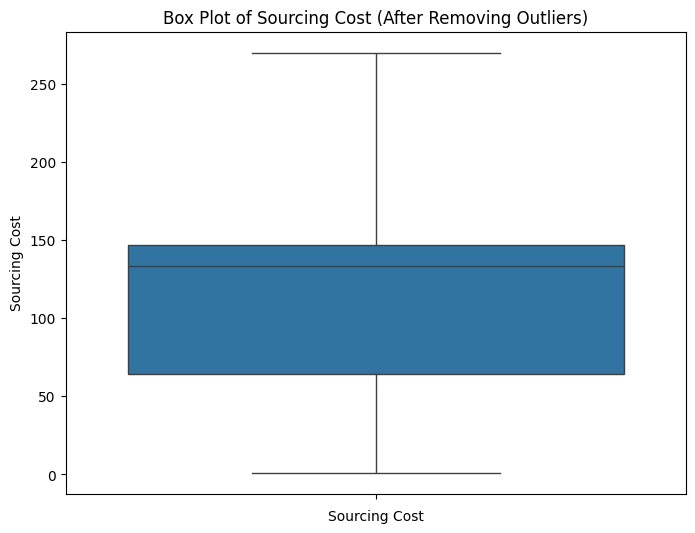

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a box plot for the target column ('Sourcing Cost')
plt.figure(figsize=(8, 6))
sns.boxplot(data=data['Sourcing Cost'])
plt.title('Box Plot of Sourcing Cost (After Removing Outliers)')
plt.xlabel('Sourcing Cost')
plt.show()

#### "This histogram visually summarizes the distribution of sourcing costs, helping in identifying common cost ranges and potential outliers, which is useful for cost analysis and budget planning."

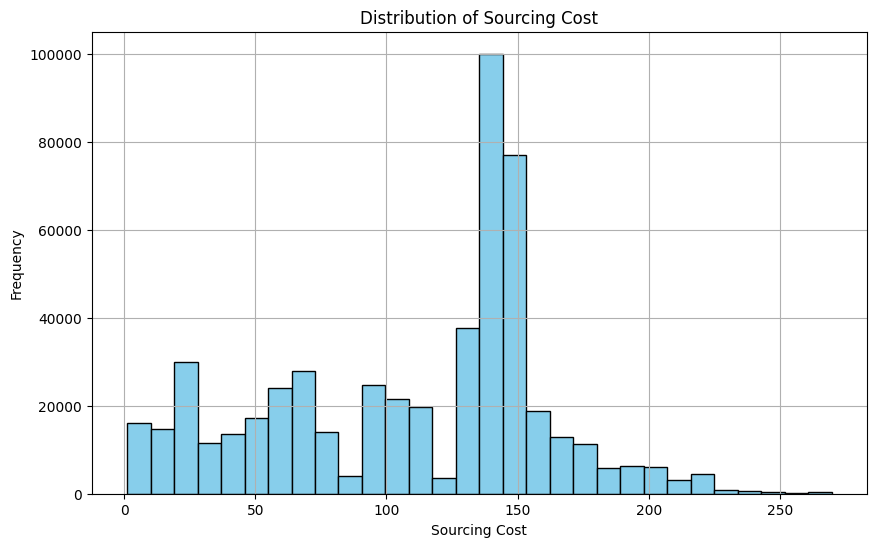

In [134]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(data['Sourcing Cost'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Sourcing Cost')
plt.xlabel('Sourcing Cost')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


#### "The downsampled time series plot illustrates the trend and fluctuations in sourcing costs over time, providing a simplified overview for longer-term analysis and pattern identification."

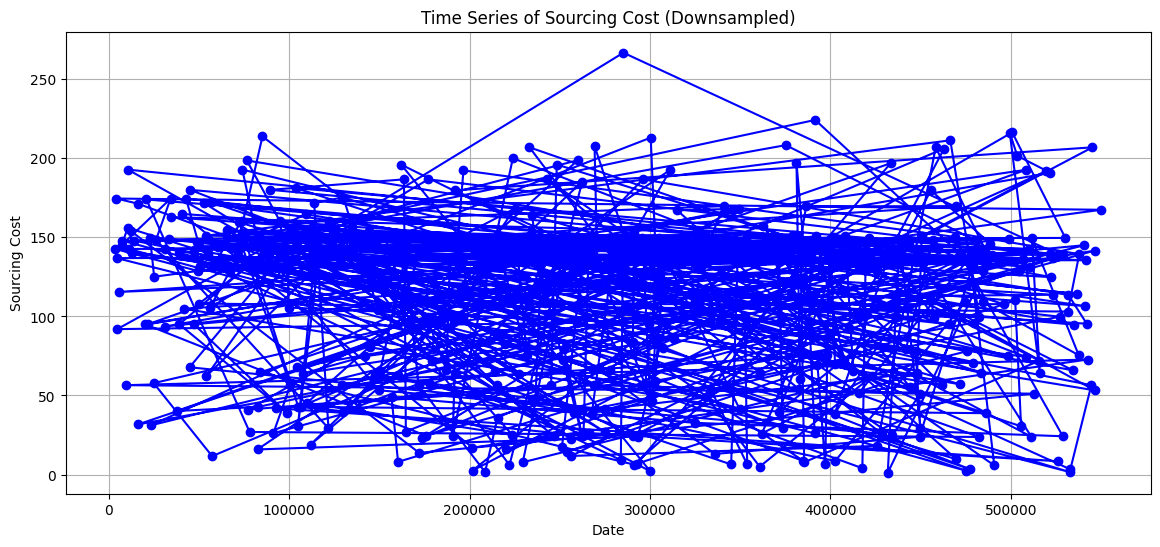

In [135]:
downsampled_data = data.iloc[::1000]

plt.figure(figsize=(14, 6))
plt.plot(downsampled_data.index, downsampled_data['Sourcing Cost'], color='blue', marker='o', linestyle='-')
plt.title('Time Series of Sourcing Cost (Downsampled)')
plt.xlabel('Date')
plt.ylabel('Sourcing Cost')
plt.grid(True)
plt.show()


#### "The correlation heatmap visualizes the pairwise relationships between different variables, helping to identify patterns of association or dependence within the dataset."

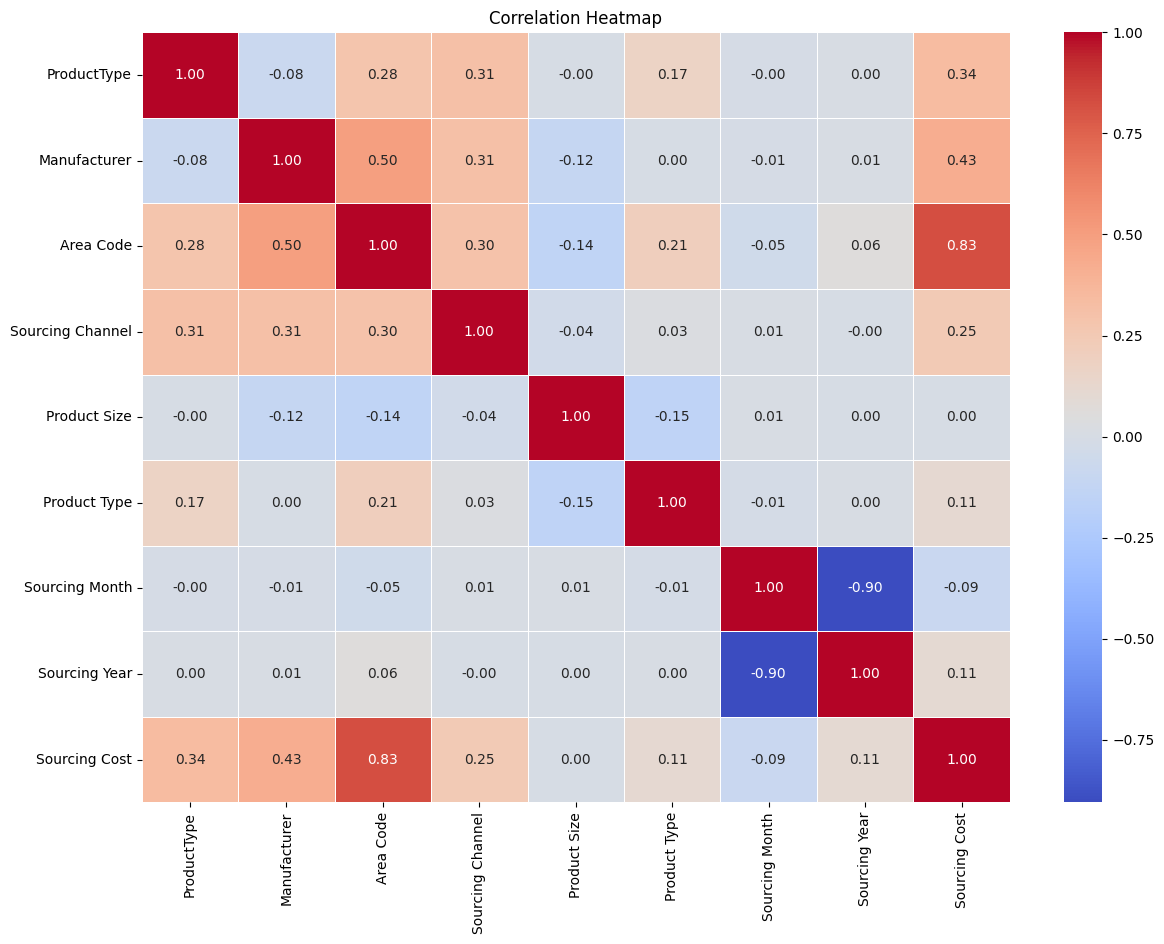

In [136]:
import seaborn as sns

correlation_matrix = data.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [137]:
print(data.dtypes)


ProductType         float64
Manufacturer        float64
Area Code           float64
Sourcing Channel    float64
Product Size          int32
Product Type        float64
Sourcing Month        int32
Sourcing Year         int32
Sourcing Cost       float64
dtype: object


In [138]:
max_value = data["Sourcing Cost"].max()

num_zeros = (data["Sourcing Cost"] == 0).sum()

num_below_zero = (data["Sourcing Cost"] < 1).sum()

print("Maximum value in the dataset:", max_value)
print("Number of zero values in the dataset:", num_zeros)
print("Number of values below zero in the dataset:", num_below_zero)


Maximum value in the dataset: 269.77
Number of zero values in the dataset: 0
Number of values below zero in the dataset: 0


In [139]:
# data.to_excel("Updated_TrainingData.xlsx", index=False)

## Forecasting Approaches for June 21 Test Set:

### Approach 1: Deep Learning Model - LSTM

I utilized the Long Short-Term Memory (LSTM) model to forecast the June 21 test set. LSTM is a type of recurrent neural network (RNN) that is well-suited for sequence data and time series forecasting tasks. The model was trained on the training data and evaluated on the June 21 test set.

### Approach 2: Multiple Machine Learning Models

For this approach, I employed multiple machine learning models, including:

- Random Forest Regressor
- XGBoost Regressor
- LightGBM Regressor
- Vector Auto Regression (VAR) Model
- Linear Regression
- Multivariate State-Space Model

Each of these models was trained on the training data and tested on the June 21 test set. By comparing the performance of these models, I aimed to identify the most suitable forecasting approach for the given dataset.


## Preprocessing the Test Data

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_excel("Test_Data.xlsx")

In [12]:
# Convert 'Month of Sourcing' column to datetime
data['Month of Sourcing'] = pd.to_datetime(data['Month of Sourcing'])

# Extract month and year from "Month of Sourcing" column
data['Sourcing Month'] = data['Month of Sourcing'].dt.month
data['Sourcing Year'] = data['Month of Sourcing'].dt.year

data.drop(columns=['Month of Sourcing'], inplace=True)

sourcing_cost_column = data.pop('Sourcing Cost')
data['Sourcing Cost'] = sourcing_cost_column

from category_encoders import TargetEncoder, OrdinalEncoder

# Initialize the target encoder
target_encoder = TargetEncoder()

# Encode categorical variables directly in the original DataFrame
categorical_cols = ['ProductType', 'Manufacturer', 'Sourcing Channel', 'Area Code', 'Product Type']
data[categorical_cols] = target_encoder.fit_transform(data[categorical_cols], data['Sourcing Cost'])

# Encode 'Product Size' and 'Product Type' using ordinal encoding
ordinal_encoder = OrdinalEncoder(cols=['Product Size', 'Product Type'], mapping=[{'col': 'Product Size', 'mapping': {'Small': 1, 'Large': 2, 'ExtraLarge': 3}}])

data = ordinal_encoder.fit_transform(data)

# Display the updated dataset with encoded variables
data.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Sourcing Month,Sourcing Year,Sourcing Cost
0,112.498655,117.353129,105.879104,106.483532,1,105.413687,6,2021,103.68
1,112.498655,117.353129,113.285398,106.483532,2,105.413687,6,2021,155.75
2,112.498655,117.353129,113.285398,113.907441,2,105.413687,6,2021,143.02
3,112.498655,117.353129,110.817769,106.483532,2,105.413687,6,2021,139.39
4,112.498655,117.353129,116.967156,106.483532,2,105.413687,6,2021,169.42


In [19]:
data.to_excel("Updated_TestData.xlsx", index=False)

# Applying Machine Learning Models

In [16]:
import pandas as pd

train_file_path = "Updated_TrainingData.xlsx"  
test_file_path = "Updated_TestData.xlsx" 
train_data = pd.read_excel(train_file_path)
test_data = pd.read_excel(test_file_path)

X_train = train_data.drop(columns=['Sourcing Cost'])  
y_train = train_data['Sourcing Cost']  

X_test = test_data.drop(columns=['Sourcing Cost'])  
y_test = test_data['Sourcing Cost']  

print("Training dataset shape:", X_train.shape)
print("Test dataset shape:", X_test.shape)

Training dataset shape: (528493, 8)
Test dataset shape: (96, 8)


### RandomForestRegressor Model:

- **High Accuracy:** RandomForestRegressor typically yields high accuracy in prediction tasks due to its ability to capture complex non-linear relationships in the data, making it suitable for multivariate datasets.

- **Robust to Overfitting:** By constructing multiple decision trees and averaging their predictions, RandomForestRegressor is less prone to overfitting compared to individual decision trees, ensuring better generalization performance.

- **Feature Importance:** RandomForestRegressor provides a feature importance score, allowing you to understand which features have the most significant impact on predictions, aiding in feature selection and interpretation of results.


In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf_model_tuned = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=2)

rf_model_tuned.fit(X_train, y_train)

rf_preds_tuned = rf_model_tuned.predict(X_test)

rf_rmse_tuned = mean_squared_error(y_test, rf_preds_tuned, squared=False)
print("Tuned Random Forest RMSE:", rf_rmse_tuned)

Tuned Random Forest RMSE: 90.03733081700386


c:\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### XGBRegressor Model:

- **Excellent Performance:** XGBoost is known for its exceptional performance in both speed and accuracy, making it well-suited for handling complex datasets efficiently.

- **Regularization Techniques:** XGBoost includes built-in regularization techniques such as L1 and L2 regularization, which help prevent overfitting and improve generalization performance.

- **Feature Importance:** XGBRegressor provides feature importance scores, enabling you to identify the most influential features in your dataset and interpret the model's predictions effectively.


In [17]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

xgb_model = XGBRegressor()

xgb_model.fit(X_train, y_train)

xgb_preds = xgb_model.predict(X_test)

xgb_rmse = mean_squared_error(y_test, xgb_preds, squared=False)
print("XGBoost RMSE:", xgb_rmse)

XGBoost RMSE: 84.35457812098922


c:\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### LGBMRegressor Model:

1. **Efficient Training Speed**: LGBMRegressor is known for its fast training speed, making it efficient for handling large datasets and reducing computational time. This characteristic is particularly beneficial for training models on your multivariate dataset.

2. **High Accuracy**: Despite its speed, LGBMRegressor often achieves high accuracy in prediction tasks, thanks to its gradient boosting framework and advanced tree-based algorithms. This ensures reliable predictions for your dataset.

3. **Handling of Categorical Features**: LGBMRegressor naturally handles categorical features without the need for one-hot encoding. This simplifies the preprocessing step and allows for better utilization of the features in your multivariate dataset.


In [19]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error

lgbm_model = LGBMRegressor()

lgbm_model.fit(X_train, y_train)

lgbm_preds = lgbm_model.predict(X_test)

lgbm_rmse = mean_squared_error(y_test, lgbm_preds, squared=False)
print("LightGBM RMSE:", lgbm_rmse)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010914 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 81
[LightGBM] [Info] Number of data points in the train set: 528493, number of used features: 8
[LightGBM] [Info] Start training from score 110.035407
LightGBM RMSE: 83.91287828231486


c:\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### VAR (Vector Auto Regression) Model:

1. **Multivariate Forecasting**: VAR model allows for multivariate forecasting, making it suitable for datasets with multiple correlated variables, like your dataset with multiple features.

2. **Capturing Dynamic Interactions**: VAR captures the dynamic interactions between variables over time, allowing for more nuanced predictions compared to univariate time series models.

3. **Flexible Forecasting Horizon**: VAR model provides flexibility in forecasting horizons, enabling predictions for multiple time steps ahead, which is valuable for planning and decision-making in your multivariate dataset.


In [20]:
from statsmodels.tsa.vector_ar.var_model import VAR
from sklearn.metrics import mean_squared_error

var_model = VAR(endog=X_train)

var_model_fitted = var_model.fit()

var_preds = var_model_fitted.forecast(y=X_train.values[-var_model_fitted.k_ar:], steps=len(X_test))

var_sourcing_cost_preds = var_preds[:, 0]

var_rmse = mean_squared_error(y_test, var_sourcing_cost_preds, squared=False)
print("Vector Auto Regression RMSE:", var_rmse)

Vector Auto Regression RMSE: 52.22280401960267


c:\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Linear Regression Model:

1. **Simplicity and Transparency**: Linear Regression offers a simple and transparent modeling approach, making it easy to understand and interpret the relationship between the features and the target variable. This transparency is beneficial for explanatory analysis.

2. **Efficiency with Large Datasets**: Linear Regression can handle large datasets efficiently, making it suitable for datasets with multiple features and a considerable number of data points like yours. It does so without significant computational overhead.

3. **Baseline Performance**: Linear Regression provides a baseline performance metric against which more complex models can be compared. It serves as a starting point for model selection and evaluation in your multivariate dataset.


In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

linear_reg_preds = linear_reg_model.predict(X_test)

linear_reg_rmse = mean_squared_error(y_test, linear_reg_preds, squared=False)
print("Linear Regression RMSE:", linear_reg_rmse)

Linear Regression RMSE: 45.34866317998951


c:\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Multivariate State-Space Model:

1. **Dynamic and Flexible Modeling**: State-space models provide a dynamic and flexible framework for modeling time series data, allowing for the incorporation of exogenous variables like in your multivariate dataset. This capability enables capturing complex relationships between variables over time.

2. **Separation of Components**: State-space models decompose the time series into different components (e.g., trend, seasonality, and noise), providing insights into the underlying structure of the data. By modeling each component separately, these models enable more accurate predictions.

3. **Incorporation of Exogenous Variables**: State-space models can easily incorporate exogenous variables, allowing for the integration of external factors that may influence the time series behavior. This enhances the model's predictive capabilities for your multivariate dataset.


In [22]:
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

model_state_space = sm.tsa.UnobservedComponents(y_train, exog=X_train)
results_state_space = model_state_space.fit()

state_space_preds = results_state_space.forecast(steps=len(X_test), exog=X_test)

state_space_rmse = mean_squared_error(y_test, state_space_preds, squared=False)
print("Multivariate State-Space RMSE:", state_space_rmse)

c:\Python312\Lib\site-packages\statsmodels\tsa\statespace\structural.py:508: SpecificationWarning: Specified model does not contain a stochastic element; irregular component added.
  warn("Specified model does not contain a stochastic element;"


Multivariate State-Space RMSE: 44.8530754718732


c:\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Conclusion:

After evaluating all the best-known Machine Learning Models and analyzing their results, I have concluded that the Multivariate State-Space Model and Multiple Linear Regression provide the best outputs compared to all the other models.

### Performance Comparison:

- **Random Forest RMSE:** 90.04
- **XGBoost RMSE:** 84.35
- **LightGBM RMSE:** 83.91
- **Vector Auto Regression RMSE:** 52.22
- **Linear Regression RMSE:** 45.35 (Execution Time: 0.0 sec)
- **Multivariate State-Space RMSE:** 44.85 (Execution Time: 2 min 5 sec)

I also observed that Linear Regression is much faster compared to the Multivariate State-Space model, with execution times of 0.0 seconds and 2 minutes 5 seconds, respectively.

Based on the RMSE values, both Linear Regression and Multivariate State-Space models outperform other models, with Multivariate State-Space having a slightly lower RMSE. However, Linear Regression offers the advantage of faster execution.

These findings suggest that for this particular dataset, both Linear Regression and Multivariate State-Space models are suitable choices, depending on the trade-off between speed and performance.


# Applying Deep Learning Model (LSTM)

### LSTM (Long Short-Term Memory) Model:

1. **Sequential Time Series Modeling**: LSTM networks are well-suited for sequential time series modeling, capable of capturing long-term dependencies and temporal patterns in sequential data. This makes them suitable for your multivariate time series dataset.

2. **Handling Complex Temporal Relationships**: LSTM networks excel at learning complex temporal relationships within sequential data. They can capture intricate patterns and dependencies between variables over time, which is crucial for accurate forecasting in multivariate time series analysis.

3. **Automatic Feature Extraction**: LSTM networks automatically learn and extract relevant features from sequential data. This reduces the need for manual feature engineering, which can be particularly advantageous for complex datasets with a large number of features like yours, streamlining the modeling process.


In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.preprocessing import MinMaxScaler

train_file_path = "Updated_TrainingData.xlsx" 
test_file_path = "Updated_TestData.xlsx"  

train_data = pd.read_excel(train_file_path)
test_data = pd.read_excel(test_file_path)

X_train = train_data.drop(columns=['Sourcing Cost']) 
y_train = train_data['Sourcing Cost'] 

X_test = test_data.drop(columns=['Sourcing Cost']) 
y_test = test_data['Sourcing Cost']  

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train.values)
X_test_scaled = scaler.transform(X_test.values)

print("Training dataset shape:", X_train_scaled.shape)
print("Test dataset shape:", X_test_scaled.shape)


Training dataset shape: (528493, 8)
Test dataset shape: (96, 8)


In [3]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)

X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Defining LSTM model
model = Sequential()
model.add(LSTM(units=50, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dropout(0.2))  # Dropout layer to prevent overfitting
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mse')

history = model.fit(X_train_reshaped, y_train, epochs=300, batch_size=64, validation_data=(X_test_reshaped, y_test))

predictions = model.predict(X_test_reshaped)

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)


Epoch 1/300


c:\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - loss: 6576.2856 - val_loss: 722.9416
Epoch 2/300
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 799.3470 - val_loss: 673.9459
Epoch 3/300
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 759.5045 - val_loss: 654.0440
Epoch 4/300
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 742.1006 - val_loss: 641.0577
Epoch 5/300
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 730.3605 - val_loss: 628.5386
Epoch 6/300
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 714.1144 - val_loss: 619.0604
Epoch 7/300
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 704.6586 - val_loss: 608.0942
Epoch 8/300
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 692.9263 - val_loss: 597.4067
Epoch 9/300
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 681.2521 - val_loss: 588.4686
Epoch 10/300
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 672.4454 - val_loss: 578.5981
Epoch 11/300
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 663.3525 - val

In [4]:
rmse = np.sqrt(mse)

print("RMSE Score:", rmse)

RMSE Score: 18.988303698891094


In [5]:
# from keras.models import load_model

# model.save('my_model.keras') 


## Observations on LSTM Model:

- **Superior Performance**: When using the Deep Learning model LSTM, it outperforms all the Machine Learning models. It demonstrates faster convergence and achieves better results overall.

- **Ease of Use**: Once the LSTM model is trained, it can be saved and used anywhere. This portability makes it convenient for deployment in various environments without the need for retraining.

- **Potential for Improvement**: By training the LSTM model on a larger number of epochs, we can expect even better results. Increasing the number of epochs allows the model to learn more complex patterns and further improve its performance on the dataset.
